# CNN Vehicle (car) Baseline v1.0

In [1]:
import pandas as pd

from sklearn import metrics
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Download data**

download data from https://www.kaggle.com/claudiobottari/mobile-accelerometer-car-12k

In [2]:
import kaggle

kaggle.api.authenticate()
kaggle.api.dataset_download_files('mobile-accelerometer-car-12k', path='claudiobottari', unzip=False)

In [3]:
df = pd.read_csv('claudiobottari/mobile-accelerometer-car-12k.zip', compression='zip')
df.head()

,acc_x,acc_y,acc_z,target
0,-0.113725,0.083797,9.654618,0
1,-0.098162,0.087388,9.630676,0
2,-0.099359,0.094571,9.645041,0
3,-0.099359,0.089783,9.649830,0
4,-0.118513,0.087388,9.634268,0


In [4]:
df.describe()

,acc_x,acc_y,acc_z,target
count,120000.000000,120000.000000,120000.000000,120000.000000
mean,-0.354549,5.367115,6.729311,0.500000
std,1.931744,3.420114,2.588606,0.500002
min,-12.509735,-19.051361,-19.093689,0.000000
25%,-1.116619,1.902695,4.829160,0.000000
50%,-0.529119,6.922834,6.459327,0.500000
75%,-0.092177,8.182184,9.212952,1.000000
max,36.782090,13.737244,60.973206,1.000000


The Dataframe reports the accelerometer sensor values for spatial coordinates x, y and z. The target refers to the predictions of the vehicle: if the actual vehicle is a car the variable is set as 1. 
An occurrence of one second corresponds to a sample of 100 rows.

**Pre-processing**

Retrieve numpy array for X and Y from the DataFrame

In [5]:
X = df[['acc_x', 'acc_y', 'acc_z']].values
y = df[['target']].values
print(X.shape, y.shape)

(120000, 3) (120000, 1)


Reshape of the dataset according to the 100 samples for second.
Division of X and Y.

In [6]:
X = X.reshape(df.shape[0]//100, 100, 3)
y = y.reshape(df.shape[0]//100, 100)[:, 0]
print(X.shape, y.shape)

(1200, 100, 3) (1200,)


Split in Training and Validation set (25%)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(900, 100, 3) (900,)
(300, 100, 3) (300,)


**Model Setting**

Creation of the CNN model 

In [8]:
#create model
model = Sequential([
    Conv1D(16, kernel_size=3, activation='relu', input_shape=X.shape[1:], name='conv_1'),
    MaxPooling1D(name='max_pool_1'),
    Conv1D(32, kernel_size=3, activation='relu', name='conv_2'),
    MaxPooling1D(name='max_pool_2'),
    Conv1D(16, kernel_size=3, activation='relu', name='conv_3'),
    MaxPooling1D(name='max_pool_3'),
    GlobalMaxPooling1D(name='global_max'),
    Dense(1, activation='sigmoid', name='fully_connected_output')], name='vehicle_cnn_baseline')

model.summary()

Model: "vehicle_cnn_baseline"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv1D)              (None, 98, 16)            160       
_________________________________________________________________
max_pool_1 (MaxPooling1D)    (None, 49, 16)            0         
_________________________________________________________________
conv_2 (Conv1D)              (None, 47, 32)            1568      
_________________________________________________________________
max_pool_2 (MaxPooling1D)    (None, 23, 32)            0         
_________________________________________________________________
conv_3 (Conv1D)              (None, 21, 16)            1552      
_________________________________________________________________
max_pool_3 (MaxPooling1D)    (None, 10, 16)            0         
_________________________________________________________________
global_max (GlobalMaxPooling (None, 16)       

Setting of the optimizer, learning rate and loss

In [9]:
model.compile(optimizer=Adam(learning_rate=3e-3), loss='binary_crossentropy', metrics=['accuracy'])

**Training**

In [10]:
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test), verbose=2, batch_size=150)

Train on 900 samples, validate on 300 samples
Epoch 1/25
900/900 - 1s - loss: 0.3990 - accuracy: 0.8100 - val_loss: 0.1939 - val_accuracy: 0.9333
Epoch 2/25
900/900 - 0s - loss: 0.1880 - accuracy: 0.9333 - val_loss: 0.1648 - val_accuracy: 0.9300
Epoch 3/25
900/900 - 0s - loss: 0.1791 - accuracy: 0.9333 - val_loss: 0.1652 - val_accuracy: 0.9400
Epoch 4/25
900/900 - 0s - loss: 0.1627 - accuracy: 0.9367 - val_loss: 0.1528 - val_accuracy: 0.9400
Epoch 5/25
900/900 - 0s - loss: 0.1581 - accuracy: 0.9422 - val_loss: 0.1458 - val_accuracy: 0.9400
Epoch 6/25
900/900 - 0s - loss: 0.1502 - accuracy: 0.9367 - val_loss: 0.1447 - val_accuracy: 0.9400
Epoch 7/25
900/900 - 0s - loss: 0.1506 - accuracy: 0.9433 - val_loss: 0.1355 - val_accuracy: 0.9467
Epoch 8/25
900/900 - 0s - loss: 0.1510 - accuracy: 0.9267 - val_loss: 0.1638 - val_accuracy: 0.9467
Epoch 9/25
900/900 - 0s - loss: 0.1564 - accuracy: 0.9433 - val_loss: 0.1291 - val_accuracy: 0.9433
Epoch 10/25
900/900 - 0s - loss: 0.1450 - accuracy: 0.

Plot of the model accuracy and model loss in training and validation set during the 50 epochs.

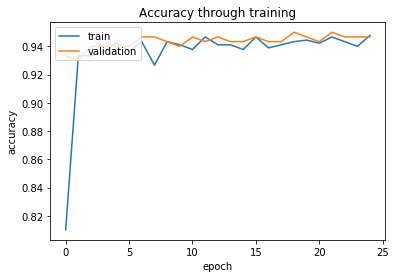

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy through training')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

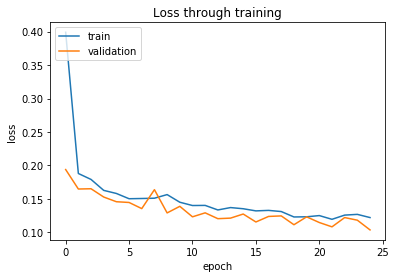

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss through training')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Test evaluation**

Calculation of the predictions, confusion matrix and some metrics.

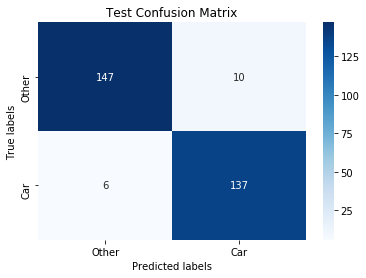

In [13]:
y_pred = model.predict(X_test)

ax = plt.subplot()
cm = metrics.confusion_matrix(y_test, (y_pred > 0.5))
sns.heatmap(cm, cmap= 'Blues', annot= cm, ax = ax, fmt="d")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Test Confusion Matrix')
ax.xaxis.set_ticklabels(['Other', 'Car'])
ax.yaxis.set_ticklabels(['Other', 'Car'])
plt.show()

In [14]:
# accuracy: (tp + tn) / (p + n)
accuracy = metrics.accuracy_score(y_test, (y_pred > 0.5))
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test, (y_pred > 0.5))
print('Precision: %f' % precision)
# recall: tp / (tp + fn)\\\\\
recall = metrics.recall_score(y_test, (y_pred > 0.5))
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test, (y_pred > 0.5))
print('F1 score: %f' % f1)

Accuracy: 0.946667
Precision: 0.931973
Recall: 0.958042
F1 score: 0.944828
